# One Shot Learning - Siamese Networks

In [79]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import random
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing import image
import os
import cv2

loading dataset

In [ ]:
def load_images_from_directory(directory):
    image_paths = []
    labels = []
    
    language_folders = os.listdir(directory)
    for language in language_folders:
        language_folder = os.path.join(directory, language)
        if os.path.isdir(language_folder):
            for character in os.listdir(language_folder):
                character_folder = os.path.join(language_folder, character)
                if os.path.isdir(character_folder):
                    for img_name in os.listdir(character_folder):
                        img_path = os.path.join(character_folder, img_name)
                        if img_path.lower().endswith(('.png', '.jpg', '.jpeg')):
                            image_paths.append(img_path)
                            labels.append(f"{language}_{character}")

    return np.array(image_paths), np.array(labels)

In [43]:
train_dir = 'D:/code_stuff/ta_tdl/omniglot2/images_background'
test_dir = 'D:/code_stuff/ta_tdl/omniglot2/images_evaluation'

train_image_paths, train_labels = load_images_from_directory(train_dir)
test_image_paths, test_labels = load_images_from_directory(test_dir)

In [ ]:
def preprocess_image(image_path, target_size=(105, 105)):
    img = cv2.imread(image_path)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_resized = cv2.resize(img_gray, target_size)
    img_resized = np.expand_dims(img_resized, axis=-1)
    img_resized = np.expand_dims(img_resized, axis=0)
    img_resized = img_resized / 255.0
    
    return img_resized

train_images = [preprocess_image(img_path) for img_path in train_image_paths]
test_images = [preprocess_image(img_path) for img_path in test_image_paths]

train_images = np.array(train_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
input_shape = (105, 105, 1)
input = layers.Input(shape=input_shape)
x = layers.Conv2D(64, (10, 10), activation='relu')(input)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (7, 7), activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Conv2D(128, (4, 4), activation='relu')(x)
x = layers.MaxPooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='sigmoid')(x)
siamese_model = Model(input, x)

Class names: ['Mkhedruli_(Georgian)_character31', 'Korean_character19', 'Malay_(Jawi_-_Arabic)_character09', 'Tagalog_character07', 'Grantha_character12', 'Futurama_character17', 'Malay_(Jawi_-_Arabic)_character16', 'Braille_character22', 'Burmese_(Myanmar)_character07', 'Japanese_(hiragana)_character40', 'Burmese_(Myanmar)_character01', 'N_Ko_character31', 'Japanese_(katakana)_character11', 'Burmese_(Myanmar)_character09', 'Asomtavruli_(Georgian)_character40', 'Balinese_character10', 'Mkhedruli_(Georgian)_character13', 'Tifinagh_character41', 'Early_Aramaic_character07', 'Burmese_(Myanmar)_character08', 'Grantha_character20', 'Anglo-Saxon_Futhorc_character27', 'Malay_(Jawi_-_Arabic)_character10', 'Ojibwe_(Canadian_Aboriginal_Syllabics)_character01', 'Sanskrit_character21', 'Korean_character08', 'Balinese_character02', 'Early_Aramaic_character02', 'Anglo-Saxon_Futhorc_character26', 'Armenian_character11', 'Ojibwe_(Canadian_Aboriginal_Syllabics)_character04', 'Syriac_(Estrangelo)_charac

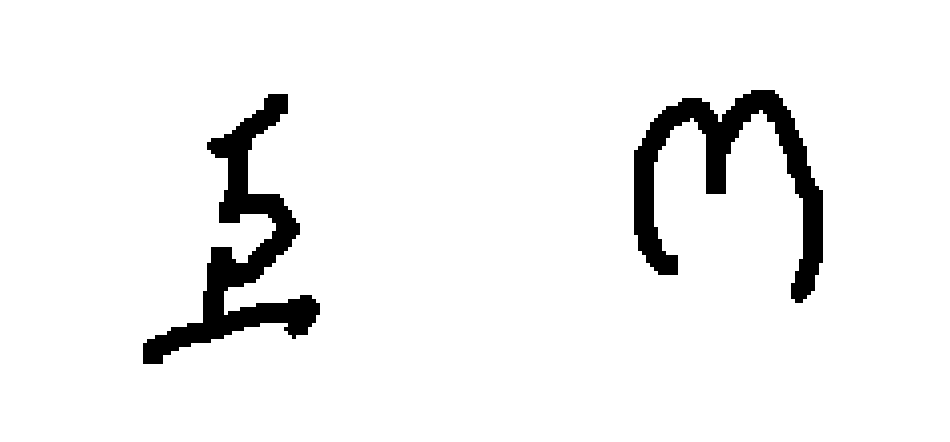

Distance between the two images: 6.258222579956055
Labels: Different Class


In [197]:
class_names = list(set(train_labels))  # Getting the unique class labels from train_labels

num_pairs = 10
pairs = []
labels = []

# Debugging the class_names
print(f"Class names: {class_names}")  # Check the unique class names

for _ in range(num_pairs):
    # Select two random classes
    class1 = random.choice(class_names)
    class2 = random.choice(class_names)

    # Get random images from each class
    img1 = random.choice([img for img, label in zip(train_images, train_labels) if label == class1])
    img2 = random.choice([img for img, label in zip(train_images, train_labels) if label == class2])

    # Create a positive pair (same class) or negative pair (different class)
    if class1 == class2:
        pairs.append((img1, img2))
        labels.append(1)  # Positive pair
    else:
        pairs.append((img1, img2))
        labels.append(0)  # Negative pair
        
embedding1 = siamese_model(pairs[0][0])  # Embedding for the first image
embedding2 = siamese_model(pairs[0][1])  # Embedding for the second image

# Compute the distance (Euclidean distance) between the embeddings
distance = tf.reduce_sum(tf.abs(embedding1 - embedding2), axis=1)

# Display the images and labels
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the first image in the pair
image1_display = np.squeeze(pairs[0][0])
image2_display = np.squeeze(pairs[0][1])

# Display the first image in the pair
axes[0].imshow(image1_display, cmap='gray')
axes[0].axis('off')

# Display the second image in the pair
axes[1].imshow(image2_display, cmap='gray')
axes[1].axis('off')

plt.show()

# Display results
print(f"Distance between the two images: {distance.numpy()[0]}")
print(f"Labels: {'Same Class' if labels[0] == 1 else 'Different Class'}")

Unique classes: ['Mkhedruli_(Georgian)_character31', 'Korean_character19', 'Malay_(Jawi_-_Arabic)_character09', 'Tagalog_character07', 'Grantha_character12', 'Futurama_character17', 'Malay_(Jawi_-_Arabic)_character16', 'Braille_character22', 'Burmese_(Myanmar)_character07', 'Japanese_(hiragana)_character40', 'Burmese_(Myanmar)_character01', 'N_Ko_character31', 'Japanese_(katakana)_character11', 'Burmese_(Myanmar)_character09', 'Asomtavruli_(Georgian)_character40', 'Balinese_character10', 'Mkhedruli_(Georgian)_character13', 'Tifinagh_character41', 'Early_Aramaic_character07', 'Burmese_(Myanmar)_character08', 'Grantha_character20', 'Anglo-Saxon_Futhorc_character27', 'Malay_(Jawi_-_Arabic)_character10', 'Ojibwe_(Canadian_Aboriginal_Syllabics)_character01', 'Sanskrit_character21', 'Korean_character08', 'Balinese_character02', 'Early_Aramaic_character02', 'Anglo-Saxon_Futhorc_character26', 'Armenian_character11', 'Ojibwe_(Canadian_Aboriginal_Syllabics)_character04', 'Syriac_(Estrangelo)_cha

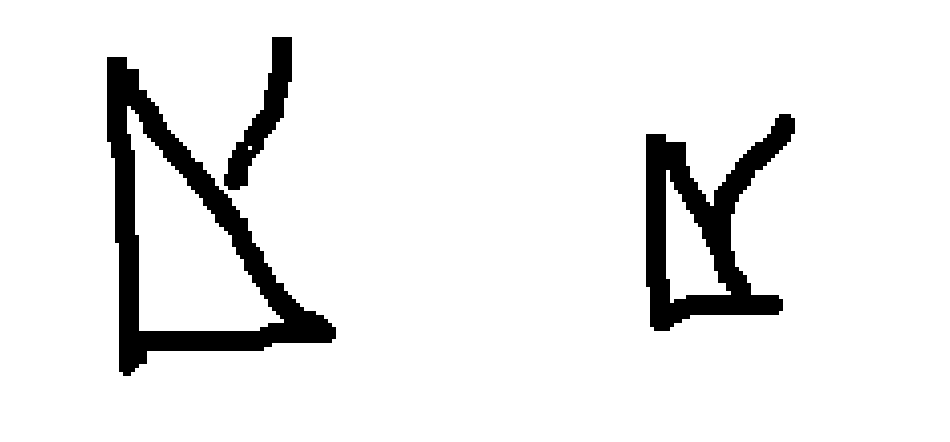

Distance between the two images: 5.962294578552246
Labels: Same Class


In [206]:
# Get unique class labels
unique_classes = list(set(train_labels))  # Getting the unique class labels from train_labels

num_image_pairs = 10
image_pairs = []
image_labels = []

# Debugging the unique classes
print(f"Unique classes: {unique_classes}")  # Check the unique class names

for _ in range(num_image_pairs):
    # Select a random class
    random_class = random.choice(unique_classes)

    # Get two random images from the same class
    img1 = random.choice([img for img, label in zip(train_images, train_labels) if label == random_class])
    img2 = random.choice([img for img, label in zip(train_images, train_labels) if label == random_class])

    # Create a positive pair (same class)
    image_pairs.append((img1, img2))
    image_labels.append(1)  # Same class pair

# Choose the first pair from the list
embedding_img1 = siamese_model(image_pairs[0][0])  # Embedding for the first image
embedding_img2 = siamese_model(image_pairs[0][1])  # Embedding for the second image

# Compute the distance (Euclidean distance) between the embeddings
distance_value = tf.reduce_sum(tf.abs(embedding_img1 - embedding_img2), axis=1)

# Display the images and labels
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Prepare images for display
image1_display = np.squeeze(image_pairs[0][0])
image2_display = np.squeeze(image_pairs[0][1])

# Display the first image in the pair
axes[0].imshow(image1_display, cmap='gray')
axes[0].axis('off')

# Display the second image in the pair
axes[1].imshow(image2_display, cmap='gray')
axes[1].axis('off')

plt.show()

# Display results
print(f"Distance between the two images: {distance_value.numpy()[0]}")
print(f"Labels: {'Same Class' if image_labels[0] == 1 else 'Different Class'}")

Class names: ['Mkhedruli_(Georgian)_character31', 'Korean_character19', 'Malay_(Jawi_-_Arabic)_character09', 'Tagalog_character07', 'Grantha_character12', 'Futurama_character17', 'Malay_(Jawi_-_Arabic)_character16', 'Braille_character22', 'Burmese_(Myanmar)_character07', 'Japanese_(hiragana)_character40', 'Burmese_(Myanmar)_character01', 'N_Ko_character31', 'Japanese_(katakana)_character11', 'Burmese_(Myanmar)_character09', 'Asomtavruli_(Georgian)_character40', 'Balinese_character10', 'Mkhedruli_(Georgian)_character13', 'Tifinagh_character41', 'Early_Aramaic_character07', 'Burmese_(Myanmar)_character08', 'Grantha_character20', 'Anglo-Saxon_Futhorc_character27', 'Malay_(Jawi_-_Arabic)_character10', 'Ojibwe_(Canadian_Aboriginal_Syllabics)_character01', 'Sanskrit_character21', 'Korean_character08', 'Balinese_character02', 'Early_Aramaic_character02', 'Anglo-Saxon_Futhorc_character26', 'Armenian_character11', 'Ojibwe_(Canadian_Aboriginal_Syllabics)_character04', 'Syriac_(Estrangelo)_charac

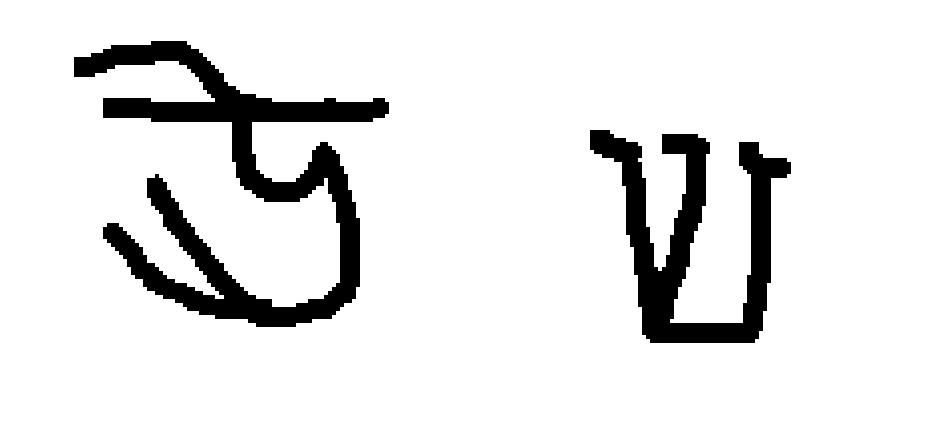

Distance between the two images: 6.768609523773193
Labels: Different Class


In [207]:
import random
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Getting unique class labels from train_labels
class_names = list(set(train_labels))  # Getting the unique class labels from train_labels

num_pairs = 10
pairs = []
labels = []
distances = []  # List to store distances for each pair

# Debugging the class_names
print(f"Class names: {class_names}")  # Check the unique class names

# Generate pairs
for _ in range(num_pairs):
    # Select two random classes
    class1 = random.choice(class_names)
    class2 = random.choice(class_names)

    # Get random images from each class
    img1 = random.choice([img for img, label in zip(train_images, train_labels) if label == class1])
    img2 = random.choice([img for img, label in zip(train_images, train_labels) if label == class2])

    # Create a positive pair (same class) or negative pair (different class)
    if class1 == class2:
        pairs.append((img1, img2))
        labels.append(1)  # Positive pair (same class)
    else:
        pairs.append((img1, img2))
        labels.append(0)  # Negative pair (different class)

# Loop over each pair, calculate distance, and store in list
for pair in pairs:
    embedding_img1 = siamese_model(pair[0])  # Embedding for the first image
    embedding_img2 = siamese_model(pair[1])  # Embedding for the second image

    # Compute the distance (Euclidean distance) between the embeddings
    distance_value = tf.reduce_sum(tf.abs(embedding_img1 - embedding_img2), axis=1)
    distances.append(distance_value.numpy()[0])  # Store the distance

# Calculate the average distance
average_distance = np.mean(distances)

# Display the average distance
print(f"Average distance between pairs: {average_distance}")

# For visualization purposes, you can display one of the image pairs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Choose the first pair to display
image1_display = np.squeeze(pairs[0][0])
image2_display = np.squeeze(pairs[0][1])

# Display the first image in the pair
axes[0].imshow(image1_display, cmap='gray')
axes[0].axis('off')

# Display the second image in the pair
axes[1].imshow(image2_display, cmap='gray')
axes[1].axis('off')

plt.show()

# Display results for the first pair
print(f"Distance between the two images: {distances[0]}")
print("Labels: Same Class" if labels[0] == 1 else "Labels: Different Class")

Unique classes: ['Mkhedruli_(Georgian)_character31', 'Korean_character19', 'Malay_(Jawi_-_Arabic)_character09', 'Tagalog_character07', 'Grantha_character12', 'Futurama_character17', 'Malay_(Jawi_-_Arabic)_character16', 'Braille_character22', 'Burmese_(Myanmar)_character07', 'Japanese_(hiragana)_character40', 'Burmese_(Myanmar)_character01', 'N_Ko_character31', 'Japanese_(katakana)_character11', 'Burmese_(Myanmar)_character09', 'Asomtavruli_(Georgian)_character40', 'Balinese_character10', 'Mkhedruli_(Georgian)_character13', 'Tifinagh_character41', 'Early_Aramaic_character07', 'Burmese_(Myanmar)_character08', 'Grantha_character20', 'Anglo-Saxon_Futhorc_character27', 'Malay_(Jawi_-_Arabic)_character10', 'Ojibwe_(Canadian_Aboriginal_Syllabics)_character01', 'Sanskrit_character21', 'Korean_character08', 'Balinese_character02', 'Early_Aramaic_character02', 'Anglo-Saxon_Futhorc_character26', 'Armenian_character11', 'Ojibwe_(Canadian_Aboriginal_Syllabics)_character04', 'Syriac_(Estrangelo)_cha

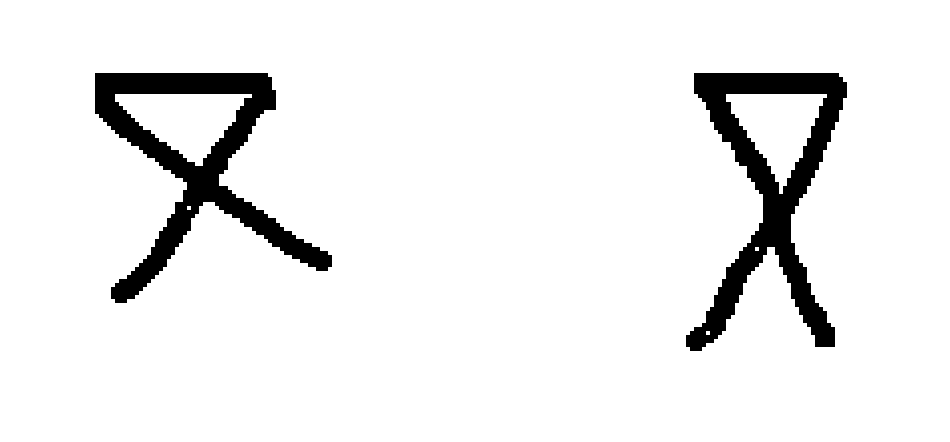

In [209]:
# Get unique class labels
unique_classes = list(set(train_labels))  # Getting the unique class labels from train_labels

num_image_pairs = 10
image_pairs = []
image_labels = []
distances = []  # List to store distances for each pair

# Debugging the unique classes
print(f"Unique classes: {unique_classes}")  # Check the unique class names

for _ in range(num_image_pairs):
    # Select a random class
    random_class = random.choice(unique_classes)

    # Get two random images from the same class
    img1 = random.choice([img for img, label in zip(train_images, train_labels) if label == random_class])
    img2 = random.choice([img for img, label in zip(train_images, train_labels) if label == random_class])

    # Create a positive pair (same class)
    image_pairs.append((img1, img2))
    image_labels.append(1)  # Same class pair

# Loop over each pair, calculate distance, and store in list
for pair in image_pairs:
    embedding_img1 = siamese_model(pair[0])  # Embedding for the first image
    embedding_img2 = siamese_model(pair[1])  # Embedding for the second image

    # Compute the distance (Euclidean distance) between the embeddings
    distance_value = tf.reduce_sum(tf.abs(embedding_img1 - embedding_img2), axis=1)
    distances.append(distance_value.numpy()[0])  # Store the distance

# Calculate the average distance
average_distance = np.mean(distances)

# Display the average distance
print(f"Average distance between pairs: {average_distance}")

# For visualization purposes, you can display one of the image pairs
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Choose the first pair to display
image1_display = np.squeeze(image_pairs[0][0])
image2_display = np.squeeze(image_pairs[0][1])

# Display the first image in the pair
axes[0].imshow(image1_display, cmap='gray')
axes[0].axis('off')

# Display the second image in the pair
axes[1].imshow(image2_display, cmap='gray')
axes[1].axis('off')

plt.show()